In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 7.8 Lab: Non-linear Modeling

> library(ISLR)

> attach(Wage)

In [3]:
Wage = pd.read_csv("data/Wage.csv")
Wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


**7.8.1 Polynomial Regression and Step Functions**

> fit=lm(wage∼poly(age ,4),data=Wage)

> coef(summary(fit))

In [4]:
#R语言中的poly生成正交多项式，尝试使用PYTHON未生成成功，直接取巧使用R语言生成的CSV数据
Wage_age = pd.read_csv("data/Wage_age.csv")
Wage_age['wage'] = Wage['wage']
results_age_poly_d4 = smf.ols('wage ~ poly_1 + poly_2 + poly_3 + poly_4',data = Wage_age).fit()
results_age_poly_d4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,111.7036,0.729,153.283,0.000,110.275,113.132
poly_1,447.0679,39.915,11.201,0.000,368.805,525.331
poly_2,-478.3158,39.915,-11.983,0.000,-556.579,-400.053
poly_3,125.5217,39.915,3.145,0.002,47.259,203.785
poly_4,-77.9112,39.915,-1.952,0.051,-156.174,0.352


> fit2=lm(wage∼poly(age ,4,raw=T),data=Wage)

> coef(summary(fit2))

> fit2a=lm(wage∼age+I(age^2)+I(age^3)+I(age^4),data=Wage)

> coef(fit2a)

In [5]:
def patsy_model_poly(factor,degree = 2):
    model_poly = factor
    for i in range(2,degree + 1):
        model_poly = model_poly + '+ I(' + factor +  '**{})'.format(str(i))
    return model_poly

In [6]:
results_age_d4 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',4)),data = Wage).fit()
results_age_d4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
age,21.2455,5.887,3.609,0.000,9.703,32.788
I(age ** 2),-0.5639,0.206,-2.736,0.006,-0.968,-0.160
I(age ** 3),0.0068,0.003,2.221,0.026,0.001,0.013
I(age ** 4),-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [7]:
results_age_d4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           2.77e-57
Time:                        21:31:00   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age            21.2455      5.887      3.609      0.000       9.703      32.788
I(age ** 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
I(age ** 3)     0.0068      0.003      2.221      0.026       0.001       0.013
I(age ** 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> agelims=range(age)

> age.grid=seq(from=agelims [1],to=agelims [2])

> preds=predict(fit,newdata=list(age=age.grid),se=TRUE)

> se.bands=cbind(preds$fit +2*preds$se .fit ,preds$fit -2*preds$se .fit)

> par(mfrow=c(1,2),mar=c(4.5,4.5,1,1) ,oma=c(0,0,4,0))

> plot(age,wage,xlim=agelims ,cex=.5,col="darkgrey ")

> title("Degree -4 Polynomial ",outer=T)

> lines(age.grid,preds$fit ,lwd=2,col="blue")

> matlines (age.grid,se.bands ,lwd=1,col="blue",lty=3)

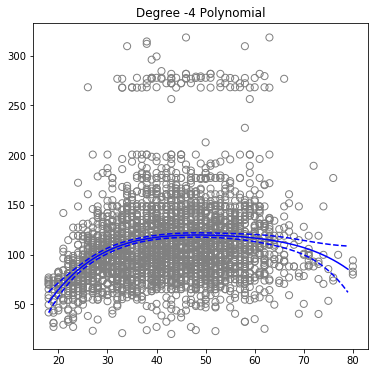

In [8]:
#这里略去了图像调整，在章节里实现，同时使用的是非poly函数的正交基（难以实现，需要用R语言生成agelims）
from statsmodels.regression.linear_model import OLSResults
from statsmodels.regression.linear_model import PredictionResults
agelims = np.arange(Wage['age'].min(),Wage['age'].max())
age_grid  = pd.DataFrame(agelims,columns = ['age'])
preds = OLSResults.get_prediction(results_age_d4,age_grid)
preds_summary = PredictionResults.summary_frame(preds)
plt.figure(figsize=(6,6))
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=50)
plt.title('Degree -4 Polynomial')
plt.plot(agelims,preds_summary['mean'],'b')
plt.plot(agelims,preds_summary['mean_ci_lower'],'b--')
plt.plot(agelims,preds_summary['mean_ci_upper'],'b--')
plt.show()

> preds2=predict(fit2,newdata=list(age=age.grid),se=TRUE)

> max(abs(preds$fit -preds2$fit ))

In [9]:
#这里为了方便实现，直接使用了原数据生成的pred
preds1_original = results_age_poly_d4.predict()
preds2_original = results_age_d4.predict()
(preds1_original - preds2_original).max()

3.7502387328913755e-07

> fit.1=lm(wage∼age,data=Wage)

> fit.2=lm(wage∼poly(age ,2),data=Wage)

> fit.3=lm(wage∼poly(age ,3),data=Wage)

> fit.4=lm(wage∼poly(age ,4),data=Wage)

> fit.5=lm(wage∼poly(age ,5),data=Wage)

> anova(fit.1,fit.2,fit.3,fit.4,fit.5)

In [10]:
#正交基结果
fit_1_poly = smf.ols('wage ~ poly_1',data = Wage_age).fit()
fit_2_poly = smf.ols('wage ~ poly_1 + poly_2',data = Wage_age).fit()
fit_3_poly = smf.ols('wage ~ poly_1 + poly_2 + poly_3',data = Wage_age).fit()
fit_4_poly = smf.ols('wage ~ poly_1 + poly_2 + poly_3 + poly_4',data = Wage_age).fit()
fit_5_poly = smf.ols('wage ~ poly_1 + poly_2 + poly_3 + poly_4 + poly_5',data = Wage_age).fit()
sm.stats.anova_lm(fit_1_poly, fit_2_poly, fit_3_poly, fit_4_poly, fit_5_poly, typ=1)

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010048,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693660,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152083,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563043,0.804976,3.696820e-01


In [11]:
#非正交基结果也一样
fit_1 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',1)),data = Wage).fit()
fit_2 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',2)),data = Wage).fit()
fit_3 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',3)),data = Wage).fit()
fit_4 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',4)),data = Wage).fit()
fit_5 = smf.ols('wage ~ {}'.format(patsy_model_poly('age',5)),data = Wage).fit()
sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [12]:
# coef(summary(fit.5)),正交基P值直接与anova_lm一致
fit_5_poly.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,111.7036,0.729,153.278,0.000,110.275,113.133
poly_1,447.0679,39.916,11.200,0.000,368.802,525.334
poly_2,-478.3158,39.916,-11.983,0.000,-556.582,-400.050
poly_3,125.5217,39.916,3.145,0.002,47.256,203.787
poly_4,-77.9112,39.916,-1.952,0.051,-156.177,0.355
poly_5,-35.8129,39.916,-0.897,0.370,-114.079,42.453


In [13]:
#t统计量与anova_lm F统计量一致
(-11.983) ** 2

143.59228900000002

> fit.1=lm(wage∼education +age ,data=Wage)

> fit.2=lm(wage∼education +poly(age ,2),data=Wage)

> fit.3=lm(wage∼education +poly(age ,3),data=Wage)

> anova(fit.1,fit.2,fit.3)

In [14]:
Wage_age['education'] = Wage['education']
fit_1_test = smf.ols('wage ~ age + education',data = Wage).fit()
fit_2_test = smf.ols('wage ~ poly_1 + poly_2 + education',data = Wage_age).fit()
fit_3_test = smf.ols('wage ~ poly_1 + poly_2 + poly_3 + education',data = Wage_age).fit()
sm.stats.anova_lm(fit_1_poly, fit_2_poly, fit_3_poly, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010048,143.467894,2.510413e-32
2,2996.0,4.777674e+06,1.0,15755.693660,9.880133,1.687063e-03


> fit=glm(I(wage >250)∼poly(age ,4),data=Wage,family=binomial )

In [15]:
fit_poly = smf.glm('I(wage >250) ~  poly_1 + poly_2 + poly_3 + poly_4',data = Wage_age, family = sm.families.Binomial()).fit()
#因为生成正交基不方便使用非正交基
fit = smf.glm('I(wage >250) ~  {}'.format(patsy_model_poly('age',4)),data = Wage, family = sm.families.Binomial()).fit()

> preds=predict(fit,newdata=list(age=age.grid),se=T)

In [16]:
preds = fit.get_prediction(age_grid)

> pfit=exp(preds$fit )/(1+exp(preds$fit ))

> se.bands.logit = cbind(preds$fit +2*preds$se .fit , preds$fit -2*
preds$se .fit)

> se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))

> plot(age,I(wage >250),xlim=agelims ,type="n",ylim=c(0,.2))

> points(jitter(age), I((wage >250)/5),cex=.5,pch="|",
col="darkgrey ")

> lines(age.grid,pfit,lwd=2, col="blue")

> matlines (age.grid,se.bands ,lwd=1,col="blue",lty=3)

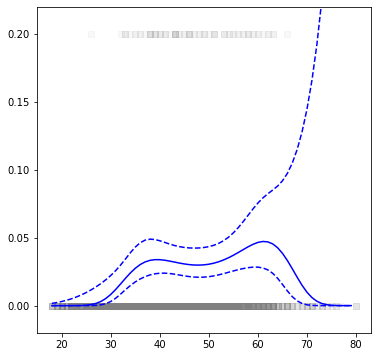

In [17]:
preds_summary = preds.summary_frame()
plt.figure(figsize=(6,6))
plt.scatter(Wage['age'],(Wage['wage'] > 250)*0.2,color='gray', marker='s', edgecolors='gray',alpha = 0.05)
plt.plot(agelims,1 - preds.predicted_mean,'b')
plt.plot(agelims,1 - preds_summary['mean_ci_lower'],'b--')
plt.plot(agelims,1 - preds_summary['mean_ci_upper'],'b--')
plt.ylim(-0.02,0.22)
plt.show()                                               

> table(cut(age ,4))

In [18]:
Wage['age_cut'] = pd.cut(Wage['age'],4)

> fit=lm(wage∼cut(age ,4),data=Wage)

> coef(summary(fit))

In [19]:
fit = smf.ols('wage ~ age_cut',data = Wage).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,94.1584,1.476,63.790,0.000,91.264,97.053
"age_cut[T.Interval(33.5, 49.0, closed='right')]",24.0535,1.829,13.148,0.000,20.466,27.641
"age_cut[T.Interval(49.0, 64.5, closed='right')]",23.6646,2.068,11.443,0.000,19.610,27.719
"age_cut[T.Interval(64.5, 80.0, closed='right')]",7.6406,4.987,1.532,0.126,-2.139,17.420


**7.8.2 Splines**

> library(splines)

> fit=lm(wage∼bs(age ,knots=c(25,40,60) ),data=Wage)

> pred=predict(fit,newdata=list(age=age.grid),se=T)

> plot(age,wage,col="gray")

> lines(age.grid,pred$fit ,lwd=2)

> lines(age.grid,pred$fit +2*pred$se ,lty="dashed")

> lines(age.grid,pred$fit -2*pred$se ,lty="dashed")

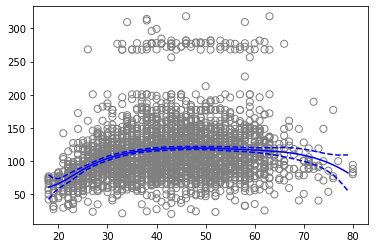

In [20]:
fit = smf.ols('wage ~ bs(age,knots=(25,40,60))',data = Wage).fit()
preds = fit.get_prediction(age_grid)
preds_summary = preds.summary_frame()
plt.scatter(Wage['age'],Wage['wage'],color='', marker='o', edgecolors='gray', s=50)
plt.plot(agelims,preds_summary['mean'],'b')
plt.plot(agelims,preds_summary['mean_ci_lower'],'b--')
plt.plot(agelims,preds_summary['mean_ci_upper'],'b--')
plt.show()

> dim(bs(age,knots=c(25,40,60) ))

> dim(bs(age,df=6))

> attr(bs(age,df=6) ,"knots")(这条没弄懂方法）

In [21]:
patsy.bs(Wage['age'],knots=(25,40,60)).shape

(3000, 6)

In [22]:
patsy.bs(Wage['age'],df = 6).shape

(3000, 6)

> fit2=lm(wage∼ns(age,df=4),data=Wage)

> pred2=predict(fit2 ,newdata=list(age=age.grid),se=T)

> lines(age.grid, pred2$fit ,col="red",lwd=2)

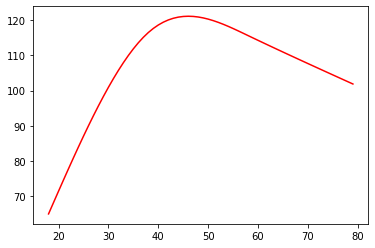

In [23]:
fit2 = smf.ols('wage ~ cr(age,df = 4)',data = Wage).fit()
preds2 = fit2.get_prediction(age_grid)
preds_summary2 = preds2.summary_frame()
plt.plot(agelims,preds_summary2['mean'],'r')
plt.show()

光滑样条部分未找到PYTHON实现方法

**7.8.3 GAM**

> gam1=lm(wage∼ns(year ,4)+ns(age ,5)+education ,data=Wage)

In [24]:
gam1 = smf.ols('wage ~ cr(year,4) + cr(age,5) + education', data=Wage).fit()

> library(gam)

> gam.m3=gam(wage∼s(year ,4)+s(age ,5)+education ,data=Wage)

In [25]:
from statsmodels.gam.api import BSplines
x_spline = Wage[['age', 'year']]
bs = BSplines(x_spline, df=[4, 5], degree=[3, 3])
gam_m3 = smf.glmgam('wage ~ education', data=Wage,smoother=bs).fit()

光滑曲线实现方案失败（总是预测 gam_m3.get_prediction(age_grid_plot)失败，未知原因，错误 shapes (62,5) and (12,) not aligned: 5 (dim 1) != 12 (dim 0)
> par(mfrow=c(1,3))

> plot(gam.m3, se=TRUE,col="blue")

由于python没有找到直接实现的方法，使用近似的方法，有所区别比较复杂
> plot.gam(gam1, se=TRUE, col="red")

In [26]:
age_grid_plot = pd.DataFrame(agelims,columns = ['age'])
age_grid_plot['year'] =  Wage['year'].median()
age_grid_plot['education'] = Wage['education'].value_counts().index[0]
yearlims = np.arange(Wage['year'].min(),Wage['year'].max())
year_grid_plot  = pd.DataFrame(yearlims,columns = ['year'])
year_grid_plot['age'] =  Wage['age'].median()
year_grid_plot['education'] = Wage['education'].value_counts().index[0]
educationlims = ['1. < HS Grad','2. HS Grad','3. Some College','4. College Grad','5. Advanced Degree']
education_grid_plot  = pd.DataFrame(educationlims,columns = ['education'])
education_grid_plot['age'] =  Wage['age'].median()
education_grid_plot['year'] =  Wage['year'].median()

In [27]:
age_pre = gam1.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam1.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam1.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()

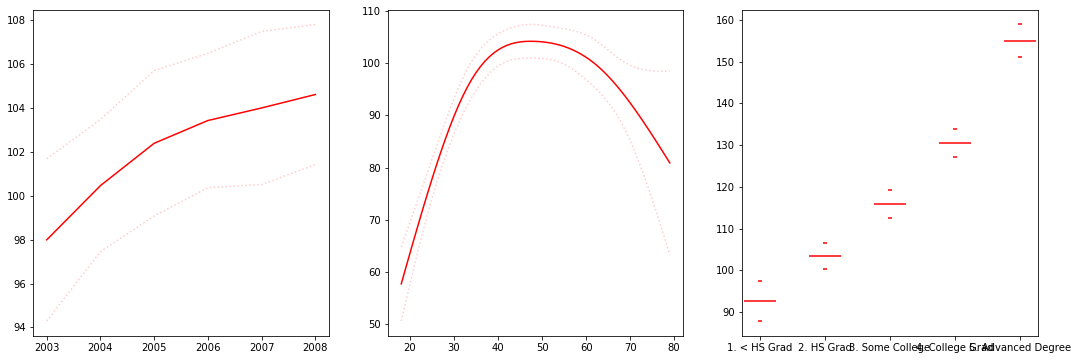

In [28]:
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,year_pre_summary['mean'],'r')
plt.plot(yearlims,year_pre_summary['mean_ci_lower'],'r:',alpha = 0.2)
plt.plot(yearlims,year_pre_summary['mean_ci_upper'],'r:',alpha = 0.2)
plt.subplot(132)
plt.plot(agelims,age_pre_summary['mean'],'r')
plt.plot(agelims,age_pre_summary['mean_ci_lower'],'r:',alpha = 0.2)
plt.plot(agelims,age_pre_summary['mean_ci_upper'],'r:',alpha = 0.2)
plt.subplot(133)
plt.scatter(educationlims,education_pre_summary['mean'],marker = '_',s = 1000,color = 'red')
plt.scatter(educationlims,education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'red')
plt.scatter(educationlims,education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'red')
plt.show()

> gam.m1=gam(wage∼s(age ,5)+education ,data=Wage)

> gam.m2=gam(wage∼year+s(age ,5)+education ,data=Wage)

> anova(gam.m1,gam.m2,gam.m3,test="F") #没有找到实现方案

In [29]:
x_spline = Wage[['age']]
bs = BSplines(x_spline, df=[5], degree=[3])
gam_m1 = smf.glmgam('wage ~ education', data=Wage,smoother=bs).fit()
gam_m2 = smf.glmgam('wage ~ education + year',data=Wage,smoother=bs).fit()

In [30]:
#因为缺少光滑样条的anova方法，使用自然样条替代，实际结果是接近的
gam1 = smf.ols('wage ~ cr(age,5) + education', data=Wage).fit()
gam2 = smf.ols('wage ~ year + cr(age,5) + education', data=Wage).fit()
gam3 = smf.ols('wage ~ cr(year,4) + cr(age,5) + education', data=Wage).fit()
sm.stats.anova_lm(gam1, gam2, gam3, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2991.0,3.717318e+06,0.0,NaN,NaN,NaN
1,2990.0,3.700612e+06,1.0,16706.497430,13.495343,0.000243
2,2988.0,3.698981e+06,2.0,1630.744277,0.658650,0.517625


> summary(gam.m3)

In [31]:
#python相差较大
gam_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                         GLMGam   Df Residuals:                     2988
Model Family:                Gaussian   Df Model:                        11.00
Link Function:               identity   Scale:                          1238.5
Method:                         PIRLS   Log-Likelihood:                -14933.
Date:                Sun, 05 Jan 2020   Deviance:                   3.7007e+06
Time:                        21:31:03   Pearson chi2:                 3.70e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          40.6908      4.260      9.552      0.000      32.342      49.040
education[T.2. HS Grad]            10.7402      2.431      4.419      0.000       5.976      15.504
education[T.3. Some College]       23.1351      2.559      9.039      0.000      18.119      28.151
education[T.4. College Grad]       37.8755      2.544     14.890      0.000      32.890      42.861
education[T.5. Advanced Degree]    62.3680      2.760     22.601      0.000      56.959      67.777
age_s0                             76.5974     10.147      7.549      0.000      56.709      96.486
age_s1                             43.0483      7.611      5.656      0.000      28.132      57.965
age_s2                             26.8803     10.695      2.513      0.012       5.919      47.841
year_s0                             0.6260      3.992      0.157      0.875      -7.198       8.450
year_s1                             9.8280      5.086      1.932      0.053      -0.140      19.796
year_s2                             3.4127      3.992      0.855      0.393      -4.411      11.236
year_s3                             7.5465      2.341      3.223      0.001       2.957      12.136
===================================================================================================
"""

> preds=predict(gam.m2,newdata=Wage)

In [32]:
#用训练集得出结果并没有得出正确方法
gam_m2.predict()

array([ 46.26927856,  99.7724981 , 112.92451822, ...,  70.27883854,
        93.61226408, 105.67088131])

> gam.lo=gam(wage∼s(year,df=4)+lo(age,span=0.7)+education ,
data=Wage)

> plot.gam(gam.lo, se=TRUE , col="green")

> gam.lo.i=gam(wage∼lo(year,age,span=0.5)+education ,
data=Wage)

> library(akima)

> plot(gam.lo.i)

没有找到局部线性回归的好方法，部分网上资料通过自编函数实现。

> gam.lr=gam(I(wage >250)∼year+s(age ,df=5)+education ,
family=binomial ,data=Wage)

> par(mfrow=c(1,3))

> plot(gam.lr,se=T,col="green")

In [33]:
#这里受限于python支持使用了自然样条cr
gam_lr = smf.glm('I(wage >250) ~  year + cr(age,df = 5) + education',data = Wage, family = sm.families.Binomial()).fit()
age_pre = gam_lr.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam_lr.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam_lr.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()

c:\users\wujiaxu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\genmod\families\links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


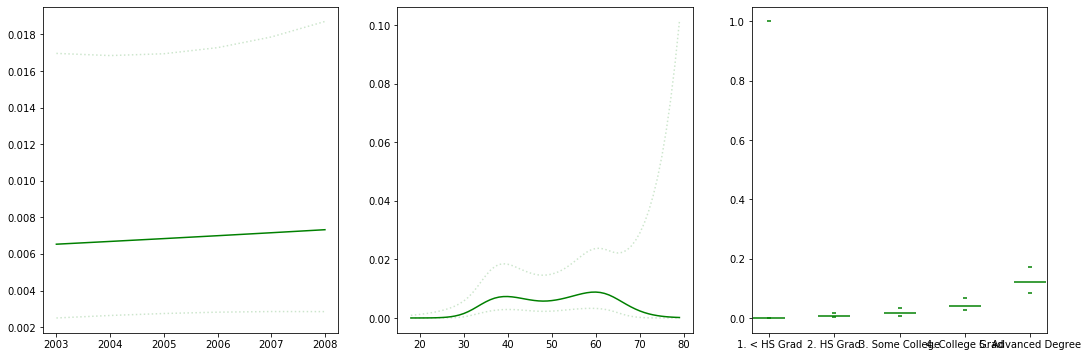

In [34]:
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,1 - year_pre_summary['mean'],'g')
plt.plot(yearlims,1- year_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(yearlims,1- year_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.subplot(132)
plt.plot(agelims,1- age_pre_summary['mean'],'g')
plt.plot(agelims,1 - age_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(agelims,1 - age_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.subplot(133)
plt.scatter(educationlims,1- education_pre_summary['mean'],marker = '_',s = 1000,color = 'g')
plt.scatter(educationlims,1- education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'g')
plt.scatter(educationlims,1 -education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'g')
plt.show()

In [35]:
Wage[Wage['wage'] > 250]['education'].value_counts()

5. Advanced Degree    45
4. College Grad       22
3. Some College        7
2. HS Grad             5
Name: education, dtype: int64

In [36]:
#依然使用自然样条cr
gam_lr = smf.glm('I(wage >250) ~  year + cr(age,df = 5) + education',data = Wage, family = sm.families.Binomial(),
                subset = (Wage['education'] !="1. < HS Grad")).fit()
educationlims = ['2. HS Grad','3. Some College','4. College Grad','5. Advanced Degree']
education_grid_plot  = pd.DataFrame(educationlims,columns = ['education'])
education_grid_plot['age'] =  Wage['age'].median()
education_grid_plot['year'] =  Wage['year'].median()
age_pre = gam_lr.get_prediction(age_grid_plot)
age_pre_summary = age_pre.summary_frame()
year_pre = gam_lr.get_prediction(year_grid_plot)
year_pre_summary = year_pre.summary_frame()
education_pre = gam_lr.get_prediction(education_grid_plot)
education_pre_summary = education_pre.summary_frame()

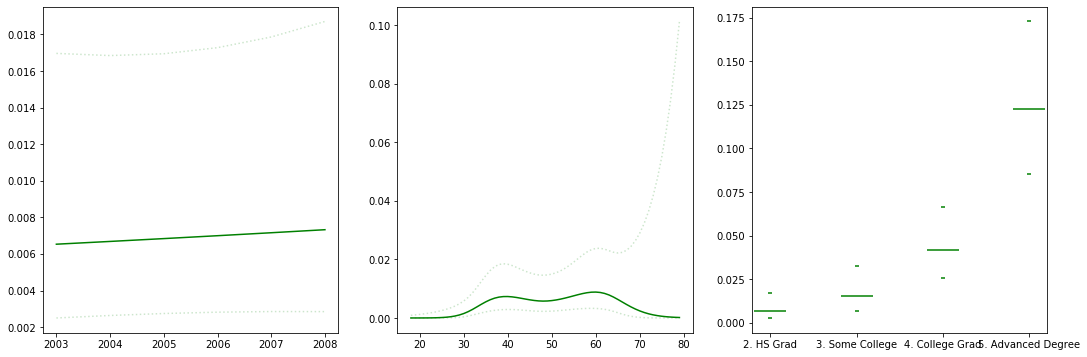

In [37]:
#生成的图例有所区别，原图为f1,f2,f3，为了简单实现这里实际为f1+belta1,f2+belta2,f3 + belta3，belta实际为由其他f中位值（或最频繁值）产生的
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.plot(yearlims,1 - year_pre_summary['mean'],'g')
plt.plot(yearlims,1- year_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(yearlims,1- year_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.subplot(132)
plt.plot(agelims,1- age_pre_summary['mean'],'g')
plt.plot(agelims,1 - age_pre_summary['mean_ci_lower'],'g:',alpha = 0.2)
plt.plot(agelims,1 - age_pre_summary['mean_ci_upper'],'g:',alpha = 0.2)
plt.subplot(133)
plt.scatter(educationlims,1- education_pre_summary['mean'],marker = '_',s = 1000,color = 'g')
plt.scatter(educationlims,1- education_pre_summary['mean_ci_lower'],marker = '_',s = 10,color = 'g')
plt.scatter(educationlims,1 -education_pre_summary['mean_ci_upper'],marker = '_',s = 10,color = 'g')
plt.show()